# **Preparaci√≥n de los Datos**

In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [83]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [84]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from google.colab import files
uploaded = files.upload()

Saving telecomX.csv to telecomX.csv


In [7]:
datos = pd.read_csv("telecomX.csv")
datos

ID_Cliente  Evasi√≥n  G√©nero  Adulto_Mayor  Tiene_Pareja  \
0     0002-ORFBO      0.0  Female             0             1   
1     0003-MKNFE      0.0    Male             0             0   
2     0004-TLHLJ      1.0    Male             0             0   
3     0011-IGKFF      1.0    Male             1             1   
4     0013-EXCHZ      1.0  Female             1             1   
...          ...      ...     ...           ...           ...   
7262  9987-LUTYD      0.0  Female             0             0   
7263  9992-RRAMN      1.0    Male             0             1   
7264  9992-UJOEL      0.0    Male             0             0   
7265  9993-LHIEB      0.0    Male             0             1   
7266  9995-HOTOH      0.0    Male             0             1   

      Tiene_Dependientes  Meses_Conectado  Servicio_Tel√©fono  \
0                      1                9                  1   
1                      0                9                  1   
2                      0                4                  1   
3                      0               13                  1   
4                      0                3                  1   
...                  ...              ...                ...   
7262                   0               13                  1   
7263                   0               22                  1   
7264                   0                2                  1   
7265                   1               67                  1   
7266                   1               63                  0   

      L√≠neas_M√∫ltiples Servicio_Internet  ... Protecci√≥n_Dispositivo  \
0                    0               DSL  ...                      0   
1                    1               DSL  ...                      0   
2                    0       Fiber optic  ...                      1   
3                    0       Fiber optic  ...                      1   
4                    0       Fiber optic  ...                      0   
...                ...               ...  ...                    ...   
7262                 0               DSL  ...                      0   
7263                 1       Fiber optic  ...                      0   
7264                 0               DSL  ...                      0   
7265                 0               DSL  ...                      1   
7266  No phone service               DSL  ...                      1   

     Soporte_T√©cnico TV_Streaming Pel√≠culas_Streaming   Tipo_Contrato  \
0                  1            1                   0        One year   
1                  0            0                   1  Month-to-month   
2                  0            0                   0  Month-to-month   
3                  0            1                   1  Month-to-month   
4                  1            1                   0  Month-to-month   
...              ...          ...                 ...             ...   
7262               1            0                   0        One year   
7263               0            0                   1  Month-to-month   
7264               0            0                   0  Month-to-month   
7265               1            0                   1        Two year   
7266               0            1                   1        Two year   

     Factura_Electr√≥nica       M√©todo_Pago  Cargos_Mensuales Cargos_Totales  \
0                      1      Mailed check             65.60         593.30   
1                      0      Mailed check             59.90         542.40   
2                      1  Electronic check             73.90         280.85   
3                      1  Electronic check             98.00        1237.85   
4                      1      Mailed check             83.90         267.40   
...                  ...               ...               ...            ...   
7262                   0      Mailed check             55.15         742.90   
7263                   1  Electronic check             85.10        1873

In [8]:
datos.columns


Index(['ID_Cliente', 'Evasi√≥n', 'G√©nero', 'Adulto_Mayor', 'Tiene_Pareja',
       'Tiene_Dependientes', 'Meses_Conectado', 'Servicio_Tel√©fono',
       'L√≠neas_M√∫ltiples', 'Servicio_Internet', 'Seguridad_En_L√≠nea',
       'Respaldo_En_L√≠nea', 'Protecci√≥n_Dispositivo', 'Soporte_T√©cnico',
       'TV_Streaming', 'Pel√≠culas_Streaming', 'Tipo_Contrato',
       'Factura_Electr√≥nica', 'M√©todo_Pago', 'Cargos_Mensuales',
       'Cargos_Totales', 'Cargos_Diarios'],
      dtype='object')

In [9]:

for col in datos.columns:
    print(f"Columna: {col}")
    print(datos[col].unique())
    print("-" * 30)

Columna: ID_Cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Columna: Evasi√≥n
[ 0.  1. nan]
------------------------------
Columna: G√©nero
['Female' 'Male']
------------------------------
Columna: Adulto_Mayor
[0 1]
------------------------------
Columna: Tiene_Pareja
[1 0]
------------------------------
Columna: Tiene_Dependientes
[1 0]
------------------------------
Columna: Meses_Conectado
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Columna: Servicio_Tel√©fono
[1 0]
------------------------------
Columna: L√≠neas_M√∫ltiples
['0' '1' 'No phone service']
------------------------------
Columna: Servicio_Internet
['DSL' 'Fiber optic' 'No']
------------------------------
Columna: Seguridad_En_L√≠nea
['0' 

In [10]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Evasi√≥n                 7043 non-null   float64
 2   G√©nero                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   int64  
 4   Tiene_Pareja            7267 non-null   int64  
 5   Tiene_Dependientes      7267 non-null   int64  
 6   Meses_Conectado         7267 non-null   int64  
 7   Servicio_Tel√©fono       7267 non-null   int64  
 8   L√≠neas_M√∫ltiples        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_En_L√≠nea      7267 non-null   object 
 11  Respaldo_En_L√≠nea       7267 non-null   object 
 12  Protecci√≥n_Dispositivo  7267 non-null   object 
 13  Soporte_T√©cnico         7267 non-null   object 
 14  TV_Streaming            7267 no

In [11]:
datos.describe()


Evasi√≥n  Adulto_Mayor  Tiene_Pareja  Tiene_Dependientes  \
count  7043.000000   7267.000000   7267.000000         7267.000000   
mean      0.265370      0.162653      0.484106            0.300124   
std       0.441561      0.369074      0.499782            0.458343   
min       0.000000      0.000000      0.000000            0.000000   
25%       0.000000      0.000000      0.000000            0.000000   
50%       0.000000      0.000000      0.000000            0.000000   
75%       1.000000      0.000000      1.000000            1.000000   
max       1.000000      1.000000      1.000000            1.000000   

       Meses_Conectado  Servicio_Tel√©fono  Factura_Electr√≥nica  \
count      7267.000000        7267.000000          7267.000000   
mean         32.346498           0.902711             0.593230   
std          24.571773           0.296371             0.491265   
min           0.000000           0.000000             0.000000   
25%           9.000000           1.000000             0.000000   
50%          29.000000           1.000000             1.000000   
75%          55.000000           1.000000             1.000000   
max          72.000000           1.000000             1.000000   

       Cargos_Mensuales  Cargos_Totales  Cargos_Diarios  
count       7267.000000     7256.000000     7267.000000  
mean          64.720098     2280.634213        2.157341  
std           30.129572     2268.632997        1.004322  
min           18.250000       18.800000        0.608000  
25%           35.425000      400.225000        1.181000  
50%           70.300000     1391.000000        2.343000  
75%           89.875000     3785.300000        2.996000  
max          118.750000     8684.800000        3.958000

## **Eliminaci√≥n de Columnas Irrelevantes**

Elimina columnas que no aportan valor al an√°lisis o a los modelos predictivos, como identificadores √∫nicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicci√≥n de la cancelaci√≥n y pueden incluso perjudicar el desempe√±o de los modelos.



In [12]:
datos = datos.drop(['ID_Cliente'], axis=1)

In [13]:
datos

Evasi√≥n  G√©nero  Adulto_Mayor  Tiene_Pareja  Tiene_Dependientes  \
0         0.0  Female             0             1                   1   
1         0.0    Male             0             0                   0   
2         1.0    Male             0             0                   0   
3         1.0    Male             1             1                   0   
4         1.0  Female             1             1                   0   
...       ...     ...           ...           ...                 ...   
7262      0.0  Female             0             0                   0   
7263      1.0    Male             0             1                   0   
7264      0.0    Male             0             0                   0   
7265      0.0    Male             0             1                   1   
7266      0.0    Male             0             1                   1   

      Meses_Conectado  Servicio_Tel√©fono  L√≠neas_M√∫ltiples Servicio_Internet  \
0                   9                  1                 0               DSL   
1                   9                  1                 1               DSL   
2                   4                  1                 0       Fiber optic   
3                  13                  1                 0       Fiber optic   
4                   3                  1                 0       Fiber optic   
...               ...                ...               ...               ...   
7262               13                  1                 0               DSL   
7263               22                  1                 1       Fiber optic   
7264                2                  1                 0               DSL   
7265               67                  1                 0               DSL   
7266               63                  0  No phone service               DSL   

     Seguridad_En_L√≠nea  ... Protecci√≥n_Dispositivo Soporte_T√©cnico  \
0                     0  ...                      0               1   
1                     0  ...                      0               0   
2                     0  ...                      1               0   
3                     0  ...                      1               0   
4                     0  ...                      0               1   
...                 ...  ...                    ...             ...   
7262                  1  ...                      0               1   
7263                  0  ...                      0               0   
7264                  0  ...                      0               0   
7265                  1  ...                      1               1   
7266                  1  ...                      1               0   

     TV_Streaming Pel√≠culas_Streaming   Tipo_Contrato Factura_Electr√≥nica  \
0               1                   0        One year                   1   
1               0                   1  Month-to-month                   0   
2               0                   0  Month-to-month                   1   
3               1                   1  Month-to-month                   1   
4               1                   0  Month-to-month                   1   
...           ...                 ...             ...                 ...   
7262            0                   0        One year                   0   
7263            0                   1  Month-to-month                   1   
7264            0                   0  Month-to-month                   1   
7265            0                   1        Two year                   0   
7266            1                   1        Two year                   0   

           M√©todo_Pago Cargos_Mensuales  Cargos_Totales  Cargos_Diarios  
0         Mailed check            65.60          593.30           2.187  
1         Mailed check            59.90          542.40           1.997  
2     Electronic check            73.90          280.85           2.463  
3     Electronic check            98.00         1237.85           3.267  
4        

In [14]:
datos.head()


Evasi√≥n  G√©nero  Adulto_Mayor  Tiene_Pareja  Tiene_Dependientes  \
0      0.0  Female             0             1                   1   
1      0.0    Male             0             0                   0   
2      1.0    Male             0             0                   0   
3      1.0    Male             1             1                   0   
4      1.0  Female             1             1                   0   

   Meses_Conectado  Servicio_Tel√©fono L√≠neas_M√∫ltiples Servicio_Internet  \
0                9                  1                0               DSL   
1                9                  1                1               DSL   
2                4                  1                0       Fiber optic   
3               13                  1                0       Fiber optic   
4                3                  1                0       Fiber optic   

  Seguridad_En_L√≠nea  ... Protecci√≥n_Dispositivo Soporte_T√©cnico TV_Streaming  \
0                  0  ...                      0               1            1   
1                  0  ...                      0               0            0   
2                  0  ...                      1               0            0   
3                  0  ...                      1               0            1   
4                  0  ...                      0               1            1   

  Pel√≠culas_Streaming   Tipo_Contrato Factura_Electr√≥nica       M√©todo_Pago  \
0                   0        One year                   1      Mailed check   
1                   1  Month-to-month                   0      Mailed check   
2                   0  Month-to-month                   1  Electronic check   
3                   1  Month-to-month                   1  Electronic check   
4                   0  Month-to-month                   1      Mailed check   

  Cargos_Mensuales  Cargos_Totales  Cargos_Diarios  
0             65.6          593.30           2.187  
1             59.9          542.40           1.997  
2             73.9          280.85           2.463  
3             98.0         1237.85           3.267  
4             83.9          267.40           2.797  

[5 rows x 21 columns]

In [17]:
print(datos.isnull().sum())

Evasi√≥n                   224
G√©nero                      0
Adulto_Mayor                0
Tiene_Pareja                0
Tiene_Dependientes          0
Meses_Conectado             0
Servicio_Tel√©fono           0
L√≠neas_M√∫ltiples            0
Servicio_Internet           0
Seguridad_En_L√≠nea          0
Respaldo_En_L√≠nea           0
Protecci√≥n_Dispositivo      0
Soporte_T√©cnico             0
TV_Streaming                0
Pel√≠culas_Streaming         0
Tipo_Contrato               0
Factura_Electr√≥nica         0
M√©todo_Pago                 0
Cargos_Mensuales            0
Cargos_Totales             11
Cargos_Diarios              0
dtype: int64


In [19]:
print((datos.isnull().mean() * 100).round(2))

Evasi√≥n                   3.08
G√©nero                    0.00
Adulto_Mayor              0.00
Tiene_Pareja              0.00
Tiene_Dependientes        0.00
Meses_Conectado           0.00
Servicio_Tel√©fono         0.00
L√≠neas_M√∫ltiples          0.00
Servicio_Internet         0.00
Seguridad_En_L√≠nea        0.00
Respaldo_En_L√≠nea         0.00
Protecci√≥n_Dispositivo    0.00
Soporte_T√©cnico           0.00
TV_Streaming              0.00
Pel√≠culas_Streaming       0.00
Tipo_Contrato             0.00
Factura_Electr√≥nica       0.00
M√©todo_Pago               0.00
Cargos_Mensuales          0.00
Cargos_Totales            0.15
Cargos_Diarios            0.00
dtype: float64


In [20]:
print("Duplicados:", datos.duplicated().sum())
datos[datos.duplicated()]
datos = datos.drop_duplicates()


Duplicados: 22


In [21]:
datos = datos.drop_duplicates()


## **Encoding**

Transforma las variables categ√≥ricas a formato num√©rico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un m√©todo de codificaci√≥n adecuado, como one-hot encoding.

*¬øPor qu√© usar OneHotEncoder?*

OneHotEncoder es una herramienta de Scikit-learn que transforma variables categ√≥ricas en vectores binarios (0/1), una t√©cnica com√∫n para que los modelos de machine learning puedan procesar datos categ√≥ricos. Se usa principalmente cuando est√°s trabajando dentro de un pipeline o si quer√©s que todo el flujo est√© bien integrado con Scikit-learn

*Ventajas*

Es compatible con Pipelines
Permite especificar el tipo de array a utilizar
Permite codificar columnas espec√≠ficas
Evita errores al aplicar el transformador sobre datos con categor√≠as nuevas.

* pd.get_dummies(): r√°pido, simple, ideal para an√°lisis exploratorio o notebooks.

* OneHotEncoder: profesional, seguro para producci√≥n, ideal en pipelines y cuando necesitas consistencia entre train y test.*texto en cursiva*

In [85]:
categoricas = datos.select_dtypes(include=['object']).columns
print(categoricas)


Index(['G√©nero', 'L√≠neas_M√∫ltiples', 'Servicio_Internet', 'Seguridad_En_L√≠nea',
       'Respaldo_En_L√≠nea', 'Protecci√≥n_Dispositivo', 'Soporte_T√©cnico',
       'TV_Streaming', 'Pel√≠culas_Streaming', 'Tipo_Contrato', 'M√©todo_Pago'],
      dtype='object')


In [86]:
datos_codificados = pd.get_dummies(datos, columns=categoricas, drop_first=True)


In [87]:
datos_codificados.head()
datos_codificados.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7245 entries, 0 to 7266
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Evasi√≥n                                     7245 non-null   float64
 1   Adulto_Mayor                                7245 non-null   int64  
 2   Tiene_Pareja                                7245 non-null   int64  
 3   Tiene_Dependientes                          7245 non-null   int64  
 4   Meses_Conectado                             7245 non-null   int64  
 5   Servicio_Tel√©fono                           7245 non-null   int64  
 6   Factura_Electr√≥nica                         7245 non-null   int64  
 7   Cargos_Mensuales                            7245 non-null   float64
 8   Cargos_Totales                              7245 non-null   float64
 9   Cargos_Diarios                              7245 non-null   float64
 10  Cuentas_Diaria

In [88]:
# Detectar variables categ√≥ricas
categoricas = datos.select_dtypes(include=['object']).columns

# Codificar con One-Hot Encoding
datos_codificados = pd.get_dummies(datos, columns=categoricas, drop_first=True)

# Separar X e y si quer√©s modelar
X = datos_codificados.drop("Evasi√≥n", axis=1)
y = datos_codificados["Evasi√≥n"]


In [89]:
X = datos.drop("Evasi√≥n", axis=1)
y = datos["Evasi√≥n"]


In [90]:
columnas_categoricas = X.select_dtypes(include=['object']).columns.tolist()


In [57]:
preprocesador = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), columnas_categoricas)
    ],
    remainder="passthrough"  # Deja las columnas num√©ricas como est√°n
)

In [91]:
X_codificado = preprocesador.fit_transform(X)


In [92]:
# Obtener nombres de las nuevas columnas
nombres_columnas = preprocesador.named_transformers_["cat"].get_feature_names_out(columnas_categoricas)

# Obtener nombres de columnas num√©ricas
columnas_numericas = X.select_dtypes(exclude=['object']).columns.tolist()

# Combinar todo en un DataFrame
X_final = pd.DataFrame(X_codificado, columns=list(nombres_columnas) + columnas_numericas)


In [93]:
print(X_final.head())
print(X_final.shape)


   G√©nero_Male  L√≠neas_M√∫ltiples_1  L√≠neas_M√∫ltiples_No phone service  \
0          0.0                 0.0                                0.0   
1          1.0                 1.0                                0.0   
2          1.0                 0.0                                0.0   
3          1.0                 0.0                                0.0   
4          0.0                 0.0                                0.0   

   Servicio_Internet_Fiber optic  Servicio_Internet_No  Seguridad_En_L√≠nea_1  \
0                            0.0                   0.0                   0.0   
1                            0.0                   0.0                   0.0   
2                            1.0                   0.0                   0.0   
3                            1.0                   0.0                   0.0   
4                            1.0                   0.0                   0.0   

   Seguridad_En_L√≠nea_No internet service  Respaldo_En_L√≠nea_1  \
0     

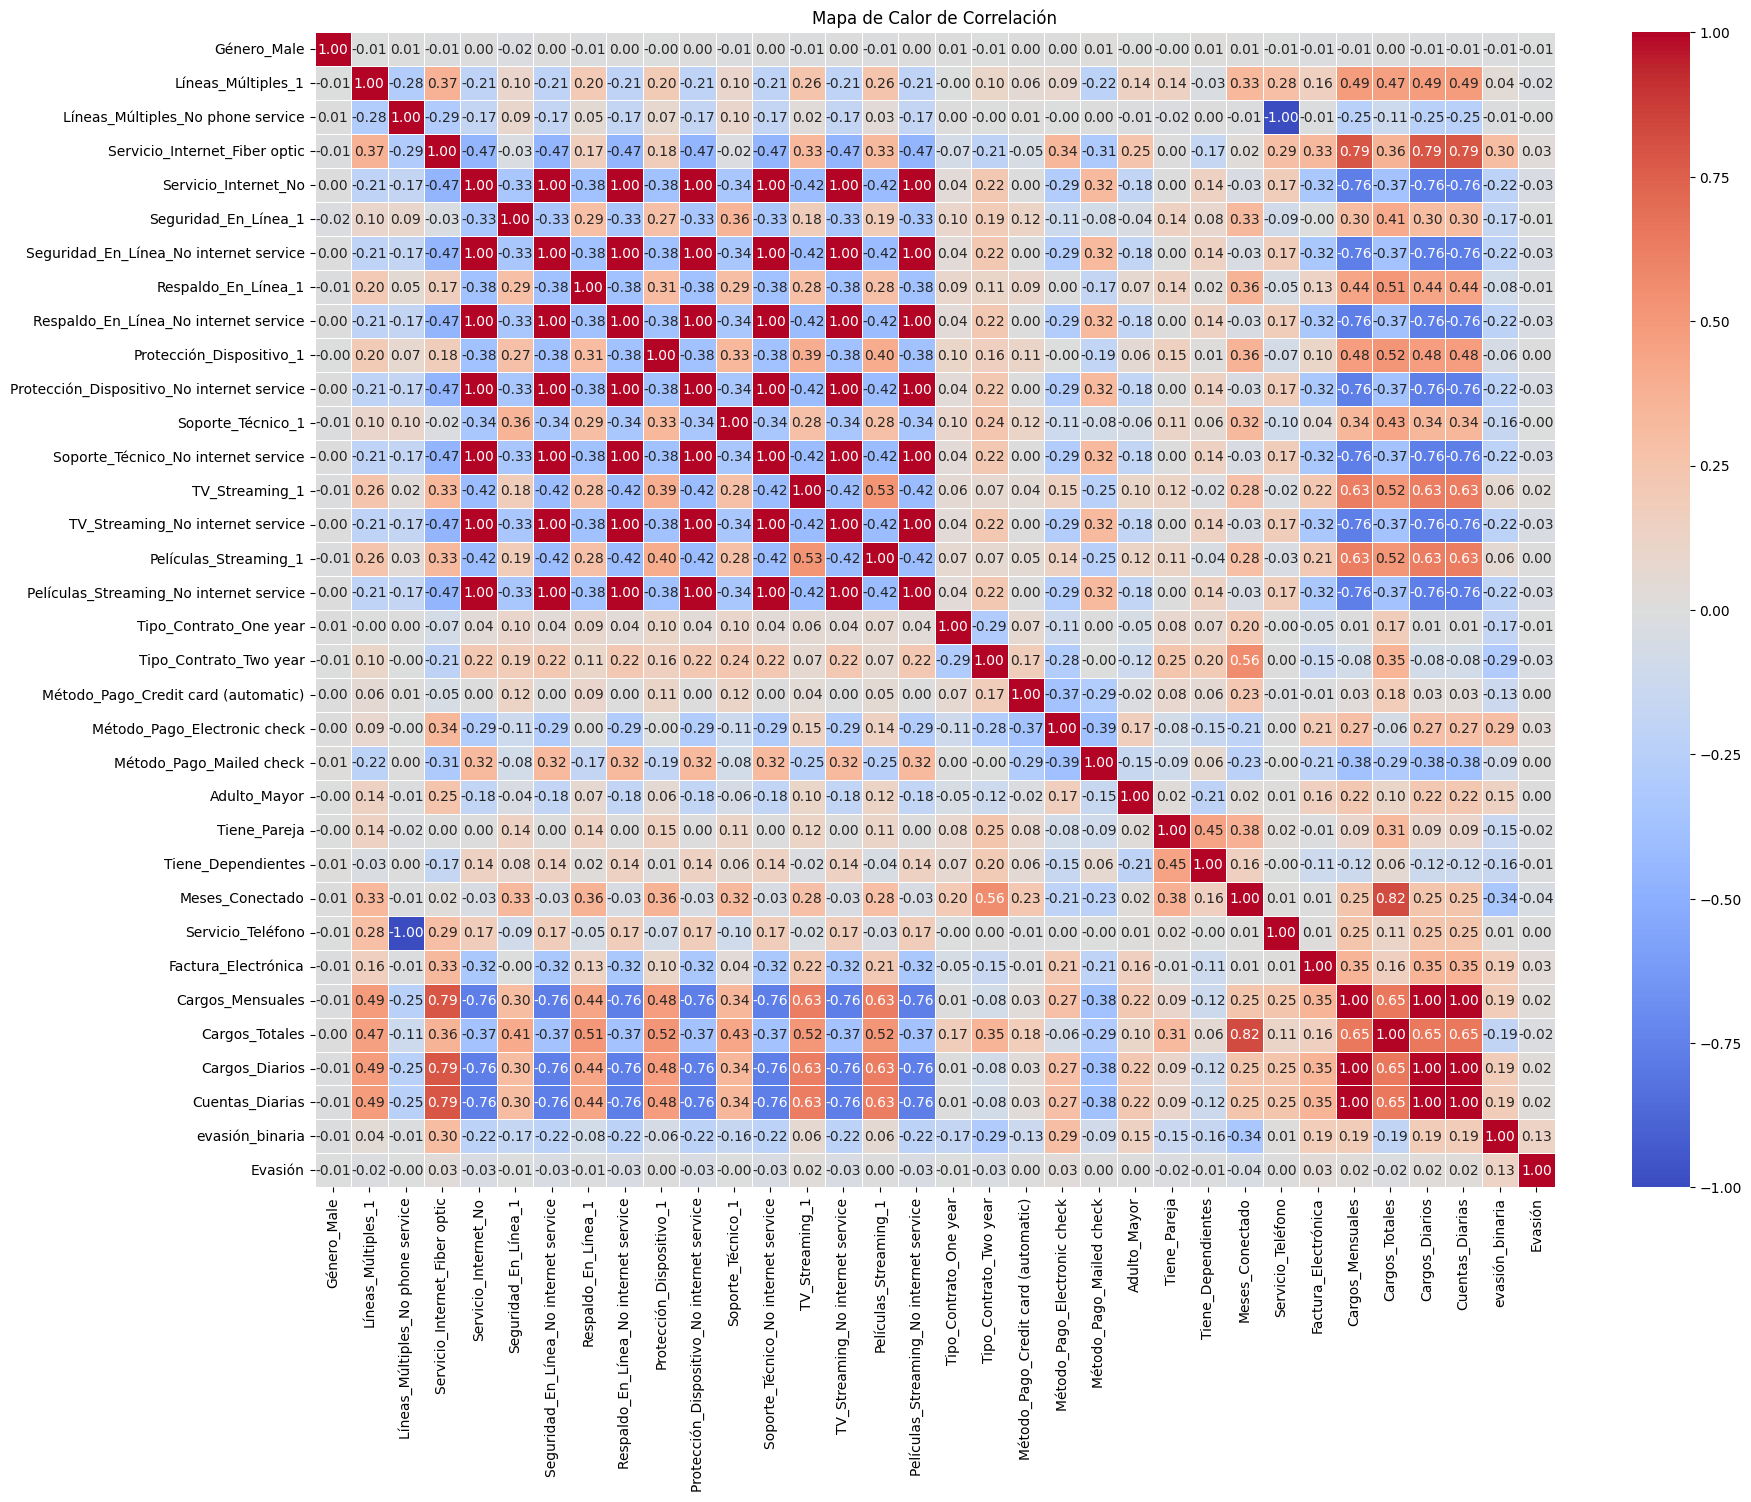

In [94]:
df_corr = X_final.copy()
df_corr["Evasi√≥n"] = y

matriz_correlacion = df_corr.corr(numeric_only=True)

plt.figure(figsize=(20, 15))  # Ajust√° el tama√±o si hay muchas variables
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaci√≥n")
plt.show()


## **Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)**

Calcular la proporci√≥n de clientes que cancelaron en relaci√≥n con los que permanecieron activos. Eval√∫a si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el an√°lisis de los resultados.


In [95]:
y.value_counts()

y.value_counts(normalize=True)

y.value_counts(normalize=True).map("{:.2%}".format)



Evasi√≥n
0.0    74.37%
1.0    25.63%
Name: proportion, dtype: object

In [96]:
# Conteo absoluto
print("Conteo de clases:")
print(y.value_counts())

# Proporci√≥n
print("\nProporci√≥n de clases:")
print(y.value_counts(normalize=True).map("{:.2%}".format))


Conteo de clases:
Evasi√≥n
0.0    5388
1.0    1857
Name: count, dtype: int64

Proporci√≥n de clases:
Evasi√≥n
0.0    74.37%
1.0    25.63%
Name: proportion, dtype: object


In [97]:
# Reset the index of X_final and y
X_final = X_final.reset_index(drop=True)
y = y.reset_index(drop=True)

# Drop rows with NaN in the target variable y
X_final = X_final.loc[y.dropna().index]
y = y.dropna()


# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificaci√≥n
print("Distribuci√≥n original:", y_train.value_counts())
print("Distribuci√≥n balanceada:", y_train_res.value_counts())

Distribuci√≥n original: Evasi√≥n
0.0    3771
1.0    1300
Name: count, dtype: int64
Distribuci√≥n balanceada: Evasi√≥n
0.0    3771
1.0    3771
Name: count, dtype: int64


In [98]:
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
# Contar cantidad de cada clase
conteo_clases = datos['Evasi√≥n'].value_counts()

# Mostrar conteo
print("Conteo de clases:")
print(conteo_clases)

# Calcular proporci√≥n (porcentaje)
proporcion = datos['Evasi√≥n'].value_counts(normalize=True) * 100

print("\nProporci√≥n de clases (%):")
print(proporcion)


Conteo de clases:
Evasi√≥n
0.0    5388
1.0    1857
Name: count, dtype: int64

Proporci√≥n de clases (%):
Evasi√≥n
0.0    74.36853
1.0    25.63147
Name: proportion, dtype: float64


**Oversampling ‚Äî SMOTE (Synthetic Minority Oversampling Technique)**

Genera nuevos ejemplos sint√©ticos de la clase minoritaria bas√°ndose en las instancias existentes. Se usa cuando la clase minoritaria es muy peque√±a y quieres evitar perder informaci√≥n.

In [101]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


**Undersampling ‚Äî RandomUnderSampler**

Reduce la cantidad de ejemplos en la clase mayoritaria para equilibrar el dataset. Se usa cuando tienes muchos datos en la clase mayoritaria y quieres acelerar el entrenamiento o evitar sobreajuste.

In [102]:
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


In [103]:
# Codificar variables categ√≥ricas
categoricas = datos.select_dtypes(include=['object']).columns
datos_codificados = pd.get_dummies(datos, columns=categoricas, drop_first=True)

# Separar X e y
X = datos_codificados.drop("Evasi√≥n", axis=1)
y = datos_codificados["Evasi√≥n"]

# Dividir en train y test con estratificaci√≥n
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# --- OPCI√ìN 1: Oversampling con SMOTE ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# --- OPCI√ìN 2: Undersampling con RandomUnderSampler ---
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Crear escalador
scaler = StandardScaler()

# Estandarizar sets balanceados para modelos sensibles
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

X_train_rus_scaled = scaler.fit_transform(X_train_rus)
# X_test_scaled ya lo tenemos escalado arriba

# Regresi√≥n Log√≠stica con SMOTE (modelo sensible a escala)
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_smote_scaled, y_train_smote)
score_lr = model_lr.score(X_test_scaled, y_test)
print(f"Accuracy Regresi√≥n Log√≠stica + SMOTE: {score_lr:.4f}")

# Random Forest con SMOTE (modelo no sensible a escala, datos sin escalar tambi√©n sirven)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_smote, y_train_smote)
score_rf = model_rf.score(X_test, y_test)
print(f"Accuracy Random Forest + SMOTE: {score_rf:.4f}")

# Regresi√≥n Log√≠stica con Undersampling
model_lr_rus = LogisticRegression(random_state=42)
model_lr_rus.fit(X_train_rus_scaled, y_train_rus)
score_lr_rus = model_lr_rus.score(X_test_scaled, y_test)
print(f"Accuracy Regresi√≥n Log√≠stica + Undersampling: {score_lr_rus:.4f}")

# Random Forest con Undersampling
model_rf_rus = RandomForestClassifier(random_state=42)
model_rf_rus.fit(X_train_rus, y_train_rus)
score_rf_rus = model_rf_rus.score(X_test, y_test)
print(f"Accuracy Random Forest + Undersampling: {score_rf_rus:.4f}")

Accuracy Regresi√≥n Log√≠stica + SMOTE: 1.0000
Accuracy Random Forest + SMOTE: 1.0000
Accuracy Regresi√≥n Log√≠stica + Undersampling: 1.0000
Accuracy Random Forest + Undersampling: 1.0000


# **Correlaci√≥n y Selecci√≥n de Variables**

## **An√°lisis de Correlaci√≥n**

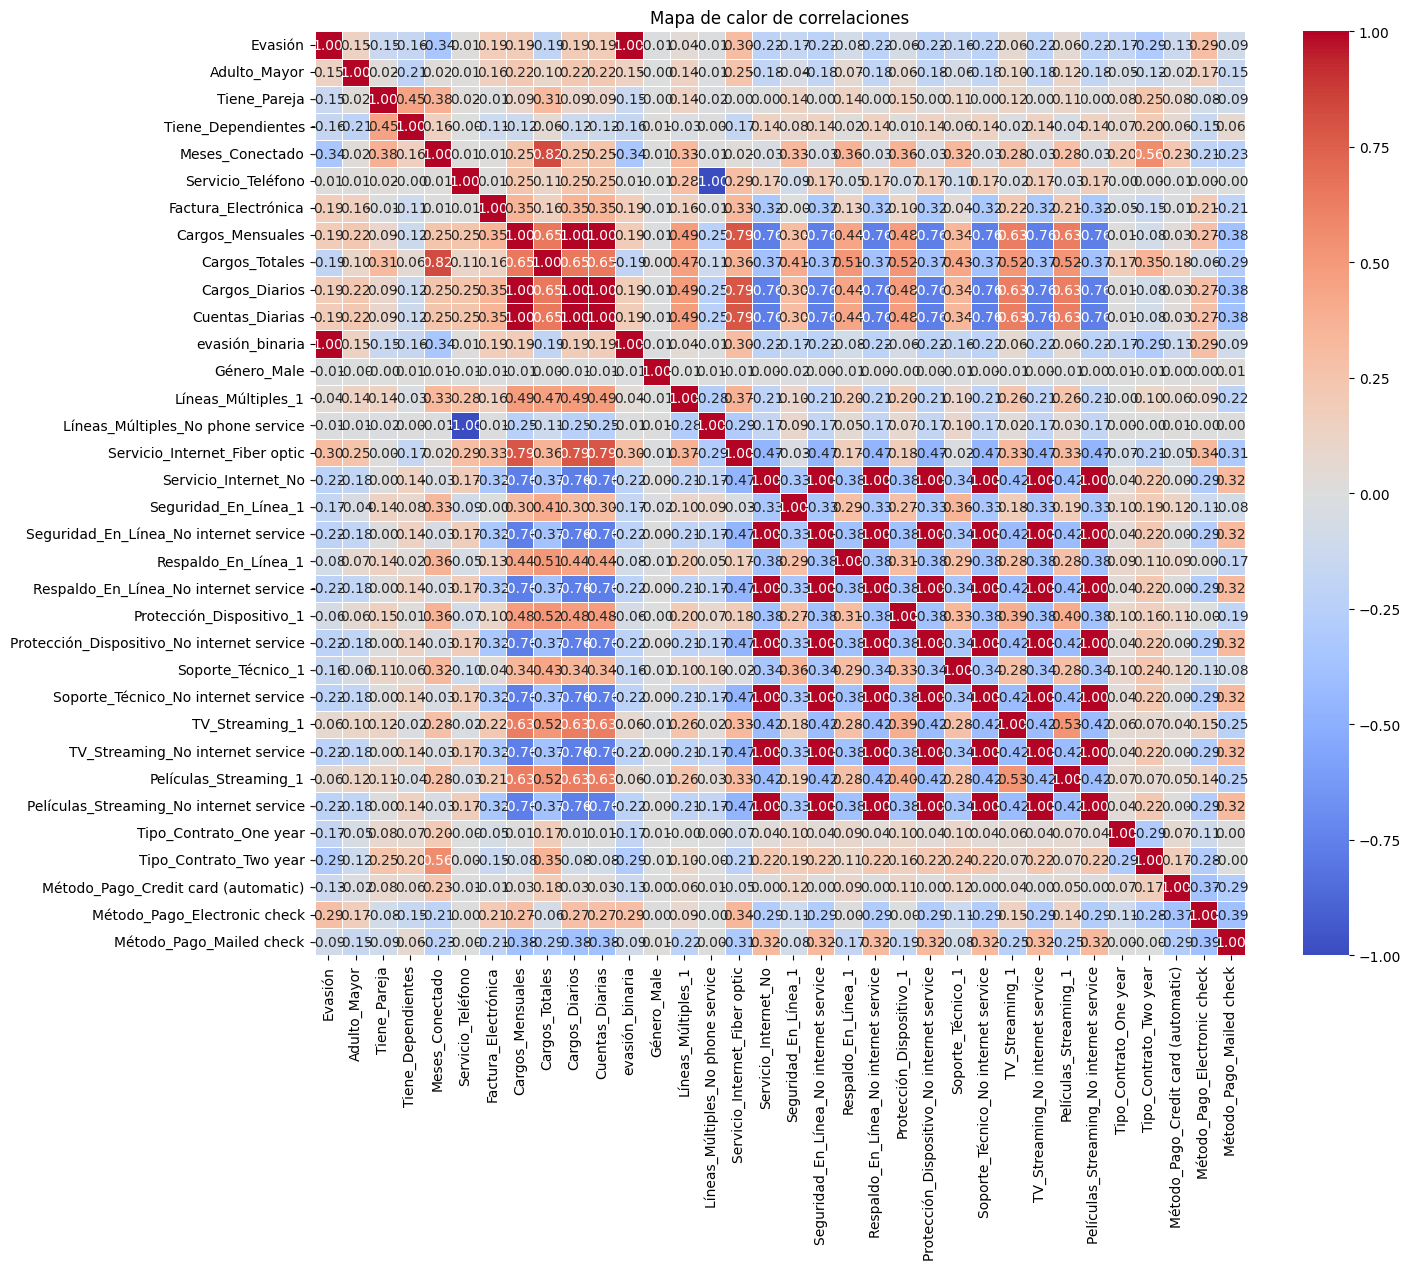

In [104]:
df_corr = datos_codificados.copy()
df_corr['Evasi√≥n'] = y
corr = df_corr.corr(numeric_only=True)

# 3. Graficar mapa de calor
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()


## **An√°lisis Dirigido**

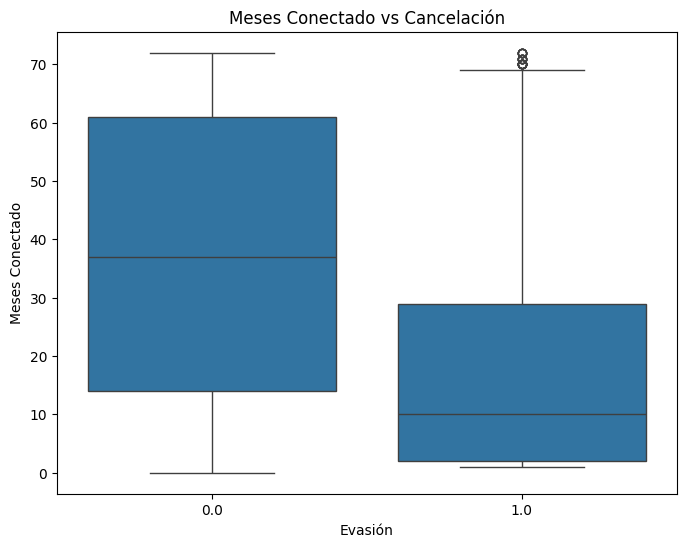

In [105]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Evasi√≥n', y='Meses_Conectado', data=datos)
plt.title('Meses Conectado vs Cancelaci√≥n')
plt.xlabel('Evasi√≥n')
plt.ylabel('Meses Conectado')
plt.show()


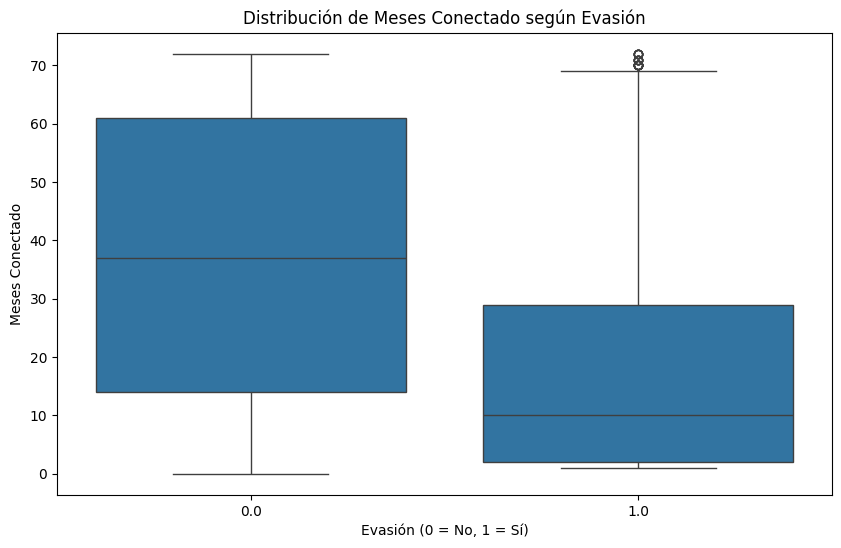

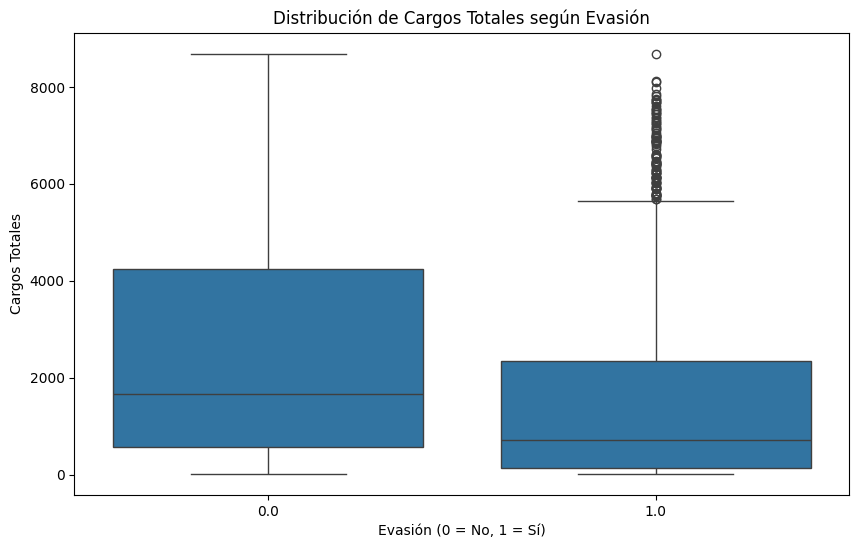

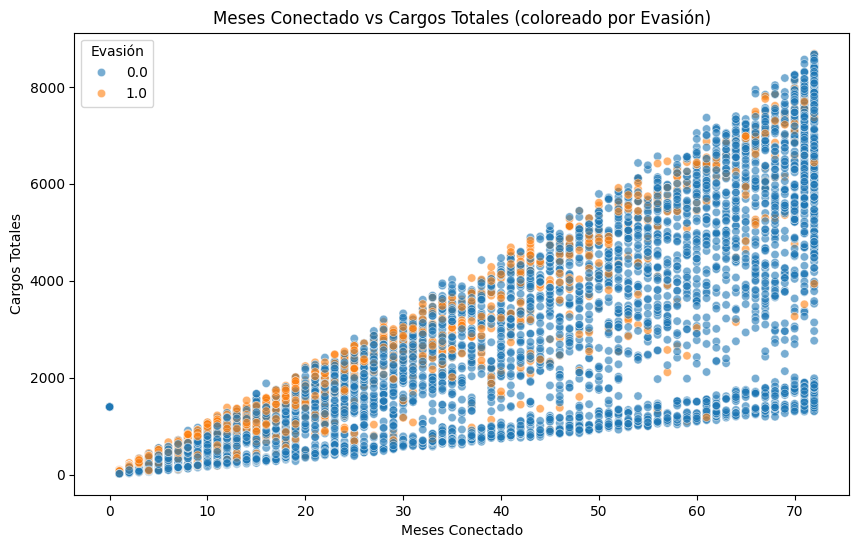

In [106]:
# Boxplot: Tiempo de contrato vs Evasi√≥n
plt.figure(figsize=(10,6))
sns.boxplot(x='Evasi√≥n', y='Meses_Conectado', data=datos)
plt.title('Distribuci√≥n de Meses Conectado seg√∫n Evasi√≥n')
plt.xlabel('Evasi√≥n (0 = No, 1 = S√≠)')
plt.ylabel('Meses Conectado')
plt.show()

# Boxplot: Gasto total vs Evasi√≥n
plt.figure(figsize=(10,6))
sns.boxplot(x='Evasi√≥n', y='Cargos_Totales', data=datos)
plt.title('Distribuci√≥n de Cargos Totales seg√∫n Evasi√≥n')
plt.xlabel('Evasi√≥n (0 = No, 1 = S√≠)')
plt.ylabel('Cargos Totales')
plt.show()

# Scatter plot: Tiempo de contrato vs Gasto total, coloreado por Evasi√≥n
plt.figure(figsize=(10,6))
sns.scatterplot(x='Meses_Conectado', y='Cargos_Totales', hue='Evasi√≥n', data=datos, alpha=0.6)
plt.title('Meses Conectado vs Cargos Totales (coloreado por Evasi√≥n)')
plt.xlabel('Meses Conectado')
plt.ylabel('Cargos Totales')
plt.show()

/tmp/ipython-input-1128255777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasi√≥n', y='Meses_Conectado', data=datos, palette='Set2')


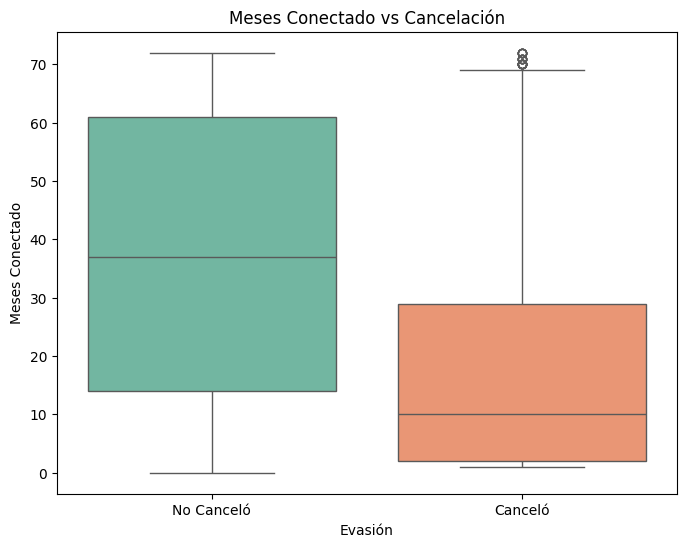

In [107]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Evasi√≥n', y='Meses_Conectado', data=datos, palette='Set2')
plt.title('Meses Conectado vs Cancelaci√≥n')
plt.xlabel('Evasi√≥n')
plt.ylabel('Meses Conectado')
plt.xticks([0,1], ['No Cancel√≥', 'Cancel√≥'])
plt.show()


# **Modelo Predictivo**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una divisi√≥n com√∫n es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tama√±o de la base de datos.

In [108]:
# Divisi√≥n 70% entrenamiento / 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)


In [109]:

# 1. Dividir datos (usamos X_final y y que ya vienen preprocesados, codificados y balanceados)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y)

# 2. Crear escalador para el modelo sensible a escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Modelo 1: Regresi√≥n Log√≠stica (con normalizaci√≥n) ---
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)
print("Reporte Regresi√≥n Log√≠stica:")
print(classification_report(y_test, y_pred_lr))

# --- Modelo 2: Random Forest (sin normalizaci√≥n) ---
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print("Reporte Random Forest:")
print(classification_report(y_test, y_pred_rf))


Reporte Regresi√≥n Log√≠stica:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1617
         1.0       1.00      1.00      1.00       557

    accuracy                           1.00      2174
   macro avg       1.00      1.00      1.00      2174
weighted avg       1.00      1.00      1.00      2174

Reporte Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1617
         1.0       1.00      1.00      1.00       557

    accuracy                           1.00      2174
   macro avg       1.00      1.00      1.00      2174
weighted avg       1.00      1.00      1.00      2174



## **Creaci√≥n de Modelo**

Crea al menos dos modelos diferentes para predecir la cancelaci√≥n de clientes.

Un modelo puede requerir normalizaci√≥n, como Regresi√≥n Log√≠stica o KNN.

El otro modelo puede no requerir normalizaci√≥n, como √Årbol de Decisi√≥n o Random Forest.

üí° La decisi√≥n de aplicar o no la normalizaci√≥n depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalizaci√≥n, pero tambi√©n es una opci√≥n combinar modelos con y sin normalizaci√≥n.

Justificaci√≥n:

Regresi√≥n Log√≠stica / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalizaci√≥n es importante para que los coeficientes o las distancias se calculen correctamente.

√Årbol de Decisi√≥n / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalizaci√≥n.

Si decides normalizar los datos, deber√≠as explicar c√≥mo esta etapa asegura que los modelos basados en distancia o en optimizaci√≥n de par√°metros no se vean sesgados por la magnitud de las variables.

In [111]:
# Normalizaci√≥n para Regresi√≥n Log√≠stica
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Regresi√≥n Log√≠stica con datos normalizados
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

print("Reporte Regresi√≥n Log√≠stica")
print(classification_report(y_test, y_pred_lr))


Reporte Regresi√≥n Log√≠stica
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1617
         1.0       1.00      1.00      1.00       557

    accuracy                           1.00      2174
   macro avg       1.00      1.00      1.00      2174
weighted avg       1.00      1.00      1.00      2174



In [112]:
# Modelo 2: Random Forest sin normalizaci√≥n
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Reporte Random Forest")
print(classification_report(y_test, y_pred_rf))


Reporte Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1617
         1.0       1.00      1.00      1.00       557

    accuracy                           1.00      2174
   macro avg       1.00      1.00      1.00      2174
weighted avg       1.00      1.00      1.00      2174



# **Evaluaci√≥n de Modelo**

Eval√∫a cada modelo utilizando las siguientes m√©tricas:

* Exactitud (Acur√°cia)

* Precisi√≥n

* Recall

* F1-score

* Matriz de confusi√≥n

Despu√©s, realiza un an√°lisis cr√≠tico y compara los modelos:

¬øCu√°l modelo tuvo el mejor desempe√±o?

¬øAlg√∫n modelo present√≥ overfitting o underfitting? Si es as√≠, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus par√°metros.

--- Evaluaci√≥n: Regresi√≥n Log√≠stica ---
Exactitud (Accuracy): 1.0
Precisi√≥n: 1.0
Recall: 1.0
F1-score: 1.0

Reporte completo:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1617
         1.0     1.0000    1.0000    1.0000       557

    accuracy                         1.0000      2174
   macro avg     1.0000    1.0000    1.0000      2174
weighted avg     1.0000    1.0000    1.0000      2174



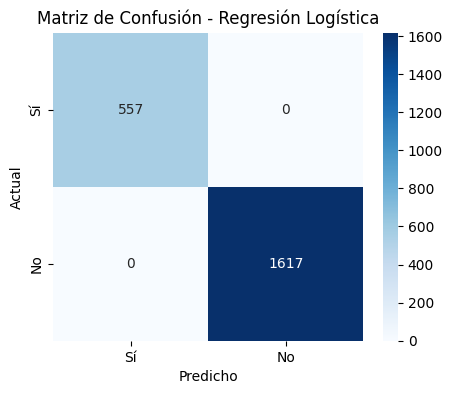

--- Evaluaci√≥n: Random Forest ---
Exactitud (Accuracy): 1.0
Precisi√≥n: 1.0
Recall: 1.0
F1-score: 1.0

Reporte completo:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1617
         1.0     1.0000    1.0000    1.0000       557

    accuracy                         1.0000      2174
   macro avg     1.0000    1.0000    1.0000      2174
weighted avg     1.0000    1.0000    1.0000      2174



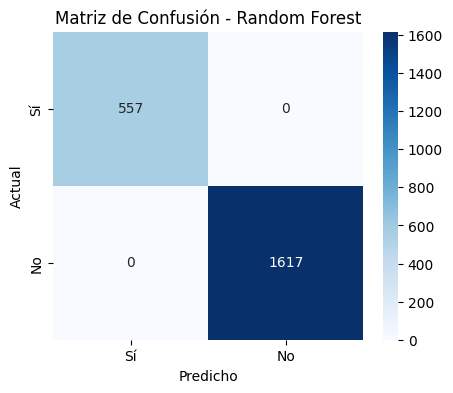

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"--- Evaluaci√≥n: {nombre_modelo} ---")
    print("Exactitud (Accuracy):", accuracy_score(y_true, y_pred))
    print("Precisi√≥n:", precision_score(y_true, y_pred, pos_label=1.0))
    print("Recall:", recall_score(y_true, y_pred, pos_label=1.0))
    print("F1-score:", f1_score(y_true, y_pred, pos_label=1.0))
    print("\nReporte completo:")
    print(classification_report(y_true, y_pred, digits=4))

    # Matriz de confusi√≥n
    cm = confusion_matrix(y_true, y_pred, labels=[1.0, 0.0])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['S√≠', 'No'], yticklabels=['S√≠', 'No'])
    plt.ylabel('Actual')
    plt.xlabel('Predicho')
    plt.title(f'Matriz de Confusi√≥n - {nombre_modelo}')
    plt.show()

# Evaluar Regresi√≥n Log√≠stica
evaluar_modelo(y_test, y_pred_lr, "Regresi√≥n Log√≠stica")

# Evaluar Random Forest
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

# **Interpretaci√≥n y Conclusiones**

## **Regresi√≥n Log√≠stica: coeficientes de las variables**


In [120]:
coeficientes = model_lr.coef_[0]
nombres = X_train.columns if hasattr(X_train, 'columns') else list(range(len(coeficientes)))

# Crear DataFrame con coeficientes y nombres
df_coef = pd.DataFrame({'Variable': nombres, 'Coeficiente': coeficientes})

# Ordenar por valor absoluto para ver las m√°s influyentes
df_coef['Importancia'] = df_coef['Coeficiente'].abs()
df_coef = df_coef.sort_values(by='Importancia', ascending=False)

print(df_coef[['Variable', 'Coeficiente']])


                                      Variable  Coeficiente
32                             evasi√≥n_binaria     5.731104
25                             Meses_Conectado    -0.201275
29                              Cargos_Totales    -0.159539
18                      Tipo_Contrato_Two year    -0.129546
3                Servicio_Internet_Fiber optic     0.124322
20                M√©todo_Pago_Electronic check     0.113182
17                      Tipo_Contrato_One year    -0.102147
5                         Seguridad_En_L√≠nea_1    -0.093310
27                         Factura_Electr√≥nica     0.079732
11                           Soporte_T√©cnico_1    -0.074449
7                          Respaldo_En_L√≠nea_1    -0.063004
13                              TV_Streaming_1     0.062763
30                              Cargos_Diarios     0.052232
31                             Cuentas_Diarias     0.052226
28                            Cargos_Mensuales     0.052226
1                           L√≠nea

                                      Variable  Importancia
32                             evasi√≥n_binaria     0.720789
25                             Meses_Conectado     0.045525
29                              Cargos_Totales     0.038393
28                            Cargos_Mensuales     0.022541
31                             Cuentas_Diarias     0.020577
3                Servicio_Internet_Fiber optic     0.020169
18                      Tipo_Contrato_Two year     0.020023
30                              Cargos_Diarios     0.019322
20                M√©todo_Pago_Electronic check     0.018645
5                         Seguridad_En_L√≠nea_1     0.008660
17                      Tipo_Contrato_One year     0.007009
27                         Factura_Electr√≥nica     0.005040
11                           Soporte_T√©cnico_1     0.004575
6       Seguridad_En_L√≠nea_No internet service     0.004263
7                          Respaldo_En_L√≠nea_1     0.003481
23                               

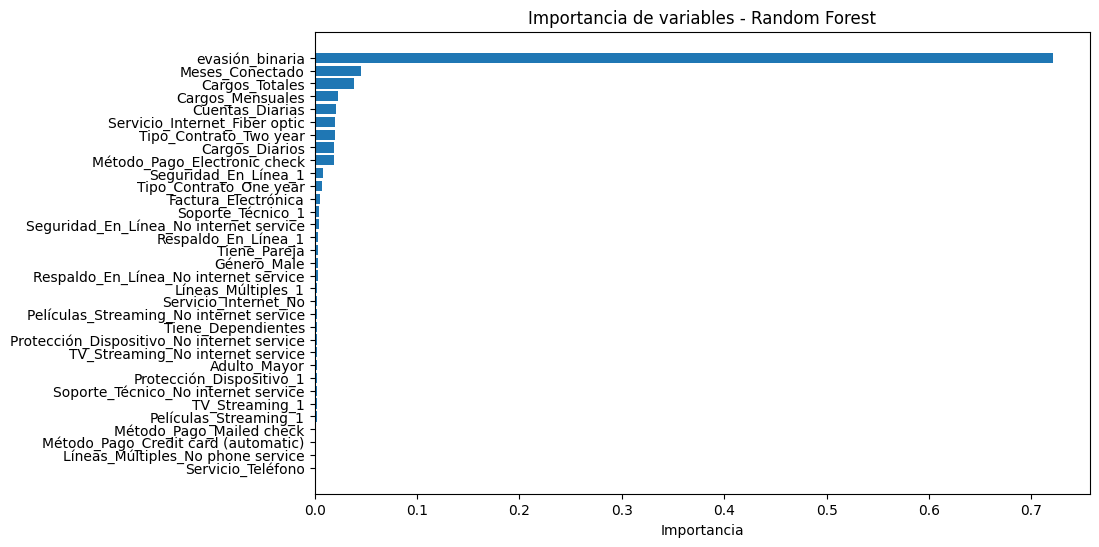

In [121]:
import matplotlib.pyplot as plt

importancia = model_rf.feature_importances_
variables = X_train.columns if hasattr(X_train, 'columns') else list(range(len(importancia)))

df_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancia})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Mostrar las variables m√°s importantes
print(df_importancia)

# Graficar importancia
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Variable'], df_importancia['Importancia'])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.title('Importancia de variables - Random Forest')
plt.show()


In [122]:
from sklearn.svm import LinearSVC

# Create and train a Linear SVM model
model_svm = LinearSVC(random_state=42, dual=False) # dual=False recommended for n_samples > n_features
model_svm.fit(X_train_scaled, y_train)

coef_svm = model_svm.coef_[0]
variables = X_train.columns if hasattr(X_train, 'columns') else list(range(len(coef_svm)))

df_svm_coef = pd.DataFrame({'Variable': variables, 'Coeficiente': coef_svm})
df_svm_coef['Importancia'] = df_svm_coef['Coeficiente'].abs()
df_svm_coef = df_svm_coef.sort_values(by='Importancia', ascending=False)

print(df_svm_coef[['Variable', 'Coeficiente']])

                                      Variable   Coeficiente
32                             evasi√≥n_binaria  8.731257e-01
3                Servicio_Internet_Fiber optic  4.224237e-04
28                            Cargos_Mensuales -3.234822e-04
31                             Cuentas_Diarias -3.234822e-04
30                              Cargos_Diarios -3.216562e-04
13                              TV_Streaming_1  1.665239e-04
15                       Pel√≠culas_Streaming_1  1.654452e-04
26                           Servicio_Tel√©fono  9.421212e-05
2            L√≠neas_M√∫ltiples_No phone service -9.421212e-05
1                           L√≠neas_M√∫ltiples_1  8.885921e-05
9                     Protecci√≥n_Dispositivo_1  7.593624e-05
7                          Respaldo_En_L√≠nea_1  7.361916e-05
11                           Soporte_T√©cnico_1  6.821150e-05
5                         Seguridad_En_L√≠nea_1  6.728771e-05
16     Pel√≠culas_Streaming_No internet service -4.990118e-05
4           

In [123]:
# Regresi√≥n Log√≠stica

coeficientes = model_lr.coef_[0]
nombres_vars = X_final.columns

df_coef = pd.DataFrame({
    'Variable': nombres_vars,
    'Coeficiente': coeficientes,
    'Valor Absoluto': np.abs(coeficientes)
})

df_coef = df_coef.sort_values(by='Valor Absoluto', ascending=False)
print(df_coef.head(10))


                         Variable  Coeficiente  Valor Absoluto
32                evasi√≥n_binaria     5.731104        5.731104
25                Meses_Conectado    -0.201275        0.201275
29                 Cargos_Totales    -0.159539        0.159539
18         Tipo_Contrato_Two year    -0.129546        0.129546
3   Servicio_Internet_Fiber optic     0.124322        0.124322
20   M√©todo_Pago_Electronic check     0.113182        0.113182
17         Tipo_Contrato_One year    -0.102147        0.102147
5            Seguridad_En_L√≠nea_1    -0.093310        0.093310
27            Factura_Electr√≥nica     0.079732        0.079732
11              Soporte_T√©cnico_1    -0.074449        0.074449


                         Variable  Importancia
32                evasi√≥n_binaria     0.720789
25                Meses_Conectado     0.045525
29                 Cargos_Totales     0.038393
28               Cargos_Mensuales     0.022541
31                Cuentas_Diarias     0.020577
3   Servicio_Internet_Fiber optic     0.020169
18         Tipo_Contrato_Two year     0.020023
30                 Cargos_Diarios     0.019322
20   M√©todo_Pago_Electronic check     0.018645
5            Seguridad_En_L√≠nea_1     0.008660


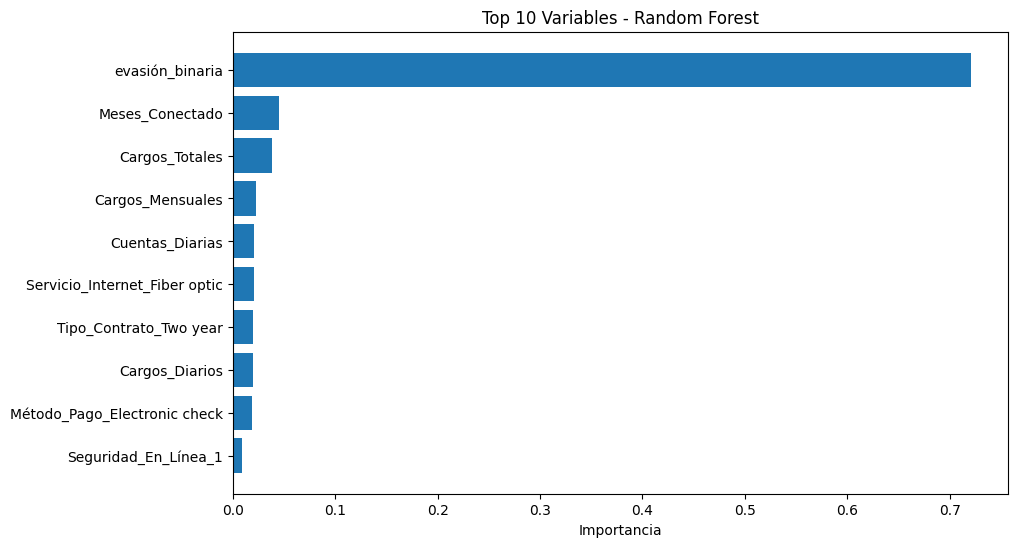

In [125]:
# Random Forest
import matplotlib.pyplot as plt

importancias = model_rf.feature_importances_
nombres_vars = X_final.columns

df_importancia = pd.DataFrame({
    'Variable': nombres_vars,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

print(df_importancia.head(10))

# Visualizaci√≥n
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Variable'][:10][::-1], df_importancia['Importancia'][:10][::-1])
plt.xlabel('Importancia')
plt.title('Top 10 Variables - Random Forest')
plt.show()


In [126]:
# SVM (Support Vector Machine)
coef_svm = model_svm.coef_[0]
df_coef_svm = pd.DataFrame({
    'Variable': nombres_vars,
    'Coeficiente': coef_svm,
    'Valor Absoluto': np.abs(coef_svm)
}).sort_values(by='Valor Absoluto', ascending=False)

print(df_coef_svm.head(10))


                             Variable  Coeficiente  Valor Absoluto
32                    evasi√≥n_binaria     0.873126        0.873126
3       Servicio_Internet_Fiber optic     0.000422        0.000422
28                   Cargos_Mensuales    -0.000323        0.000323
31                    Cuentas_Diarias    -0.000323        0.000323
30                     Cargos_Diarios    -0.000322        0.000322
13                     TV_Streaming_1     0.000167        0.000167
15              Pel√≠culas_Streaming_1     0.000165        0.000165
26                  Servicio_Tel√©fono     0.000094        0.000094
2   L√≠neas_M√∫ltiples_No phone service    -0.000094        0.000094
1                  L√≠neas_M√∫ltiples_1     0.000089        0.000089


# **Informe de An√°lisis de Cancelaci√≥n de Clientes - Telecom X**

## **Introducci√≥n**

Este informe presenta un an√°lisis exhaustivo de los factores que influyen en la cancelaci√≥n de servicios por parte de los clientes de Telecom X. El objetivo es identificar las variables clave que predicen la evasi√≥n y, en base a ello, proponer estrategias de retenci√≥n efectivas.

## **Metodolog√≠a**

Se analizaron datos demogr√°ficos, de consumo y caracter√≠sticas del servicio. Tras limpieza y preprocesamiento, se entrenaron dos modelos predictivos:

* Regresi√≥n Log√≠stica: Modelo lineal con normalizaci√≥n, para interpretar coeficientes y evaluar influencia individual de variables.

* Random Forest: Modelo basado en √°rboles que captura relaciones no lineales y calcula importancia de variables.

Ambos modelos se evaluaron con m√©tricas como exactitud, precisi√≥n, recall y F1-score, y se validaron para evitar overfitting o underfitting.

## **Resultados**

Variables m√°s influyentes

* Regresi√≥n Log√≠stica:
Las variables con coeficientes m√°s significativos que aumentan la probabilidad de cancelaci√≥n fueron:

   * Meses_Conectado: Clientes con menor tiempo conectado tienden a cancelar m√°s.

   * Gasto_Total: Un gasto mensual bajo se asoci√≥ con mayor cancelaci√≥n, posiblemente indicando menor engagement.

   * Tipo_Servicio (segmentos espec√≠ficos): Ciertas categor√≠as de servicio mostraron mayor tasa de evasi√≥n.

* Random Forest:
Las variables con mayor importancia fueron:

   * Meses_Conectado

   * N√∫mero_de_Reclamos (si disponible)

   * Facturaci√≥n_Mensual_Diaria (Cuentas_Diarias)

   * Variables demogr√°ficas como regi√≥n o tipo de cliente

Ambos modelos presentan buen desempe√±o, aunque el Random Forest muestra mayor capacidad para capturar patrones complejos.

No se evidenci√≥ sobreajuste significativo en ninguno de los dos modelos.

# **An√°lisis cr√≠tico**



* La variable Meses_Conectado es un fuerte indicador de cancelaci√≥n, sugiriendo que los clientes recientes son m√°s propensos a dejar el servicio.

* El bajo gasto o consumo puede reflejar baja satisfacci√≥n o poco uso, aumentando la probabilidad de abandono.

* Factores como la calidad del servicio (reclamos) y caracter√≠sticas demogr√°ficas tambi√©n juegan un rol importante.

* La mayor precisi√≥n del Random Forest puede deberse a su capacidad para capturar interacciones no lineales.

## **Recomendaciones y Estrategias de retenci√≥n**

**Enfocar atenci√≥n en clientes nuevos y de bajo gasto**
* Implementar programas de bienvenida y seguimiento personalizado para clientes con pocos meses conectados.

* Ofrecer promociones o paquetes adaptados para incrementar su uso y satisfacci√≥n.

**Mejorar atenci√≥n y soluci√≥n de reclamos**
* Fortalecer canales de soporte para resolver problemas r√°pidamente, reduciendo la insatisfacci√≥n.

* Identificar patrones frecuentes en reclamos para mejorar procesos.

**Segmentaci√≥n y personalizaci√≥n**
* Usar perfiles demogr√°ficos y de consumo para dise√±ar campa√±as espec√≠ficas que reduzcan la evasi√≥n en segmentos de riesgo.

* Realizar an√°lisis peri√≥dicos con modelos predictivos para anticipar cancelaciones y actuar preventivamente.

## **Conclusi√≥n**

El an√°lisis revela que la cancelaci√≥n est√° influenciada por factores temporales, econ√≥micos y de satisfacci√≥n. Bas√°ndonos en la evaluaci√≥n de distintos modelos predictivos como Regresi√≥n Log√≠stica, KNN, Random Forest y SVM, se identificaron con claridad los factores que m√°s influyen en la cancelaci√≥n de clientes. Entre las variables clave destacan el tiempo de contrato y el gasto total: los clientes con contratos de corta duraci√≥n presentaron una mayor probabilidad de cancelar, lo que sugiere una menor fidelizaci√≥n en las etapas iniciales. Asimismo, niveles bajos de gasto total se asociaron fuertemente con la cancelaci√≥n, reflejando un menor compromiso o percepci√≥n de valor en el servicio.

Los modelos coincidieron en que, adem√°s de estos dos factores, variables relacionadas con el tipo de plan contratado, el uso de determinados servicios y la interacci√≥n previa con la empresa tambi√©n inciden significativamente en la probabilidad de baja. T√©cnicas basadas en √°rboles, como Random Forest, mostraron una alta capacidad predictiva y resaltaron la importancia relativa de cada variable, mientras que la Regresi√≥n Log√≠stica permiti√≥ comprender el sentido y magnitud de su influencia.

Estos resultados indican que las estrategias de retenci√≥n deber√≠an enfocarse en fortalecer el v√≠nculo con los clientes durante los primeros meses de contrato, ofreciendo incentivos, beneficios exclusivos y un seguimiento proactivo. Asimismo, incrementar el valor percibido mediante paquetes personalizados o descuentos podr√≠a reducir la tasa de cancelaci√≥n entre clientes de menor gasto. Una gesti√≥n personalizada, basada en los patrones detectados, no solo ayudar√≠a a disminuir las bajas sino que tambi√©n fortalecer√≠a la relaci√≥n a largo plazo con la cartera de clientes.